In [1]:
!pip install retina-face

In [47]:
from retinaface import RetinaFace
import cv2
from google.colab import files
from IPython.display import display
from google.colab.patches import cv2_imshow

In [63]:
print("Incarcati o imagine de test")
uploaded_test_image = files.upload()  # Allows user to upload a file
# Get the first uploaded file
uploaded_test_image_path = list(uploaded_test_image.keys())[0]

Incarcati o imagine de test


Saving maxresdefault.jpg to maxresdefault.jpg


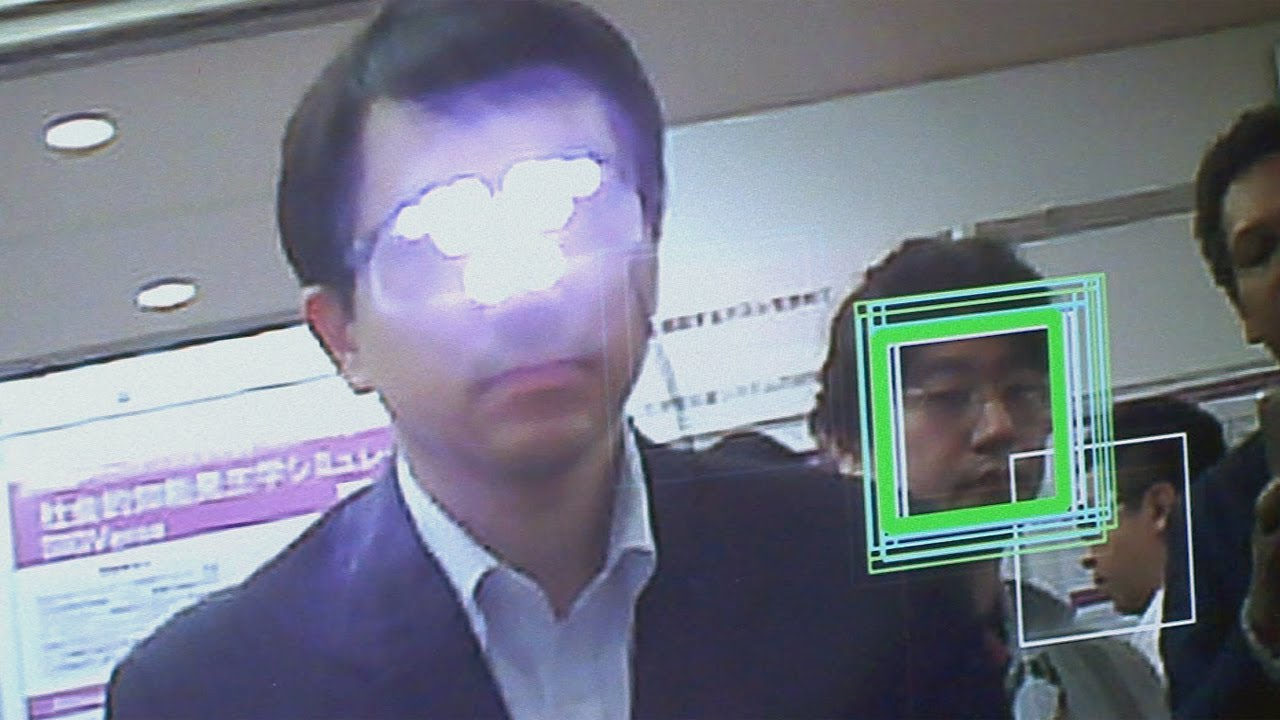

In [64]:
img = cv2.imread(uploaded_test_image_path)
cv2_imshow(img)

In [65]:
faces = RetinaFace.detect_faces(img)

In [28]:
print(faces)

{'face_1': {'score': np.float64(0.9989435076713562), 'facial_area': [np.int64(119), np.int64(214), np.int64(473), np.int64(706)], 'landmarks': {'right_eye': [np.float32(218.67902), np.float32(403.753)], 'left_eye': [np.float32(384.7358), np.float32(407.30106)], 'nose': [np.float32(301.96832), np.float32(510.1206)], 'mouth_right': [np.float32(237.60612), np.float32(595.89417)], 'mouth_left': [np.float32(355.60535), np.float32(598.79584)]}}, 'face_2': {'score': np.float64(0.997133731842041), 'facial_area': [np.int64(711), np.int64(224), np.int64(1073), np.int64(729)], 'landmarks': {'right_eye': [np.float32(819.7149), np.float32(404.91364)], 'left_eye': [np.float32(989.971), np.float32(408.5272)], 'nose': [np.float32(906.75366), np.float32(489.26318)], 'mouth_right': [np.float32(824.4252), np.float32(594.27783)], 'mouth_left': [np.float32(961.2093), np.float32(596.5175)]}}}


In [66]:
img_copy = img.copy()
for face in faces.values():
    # Extract bounding box (facial_area)
    x1, y1, x2, y2 = face['facial_area']

    # Draw the bounding box (green color, 2 thickness)
    cv2.rectangle(img_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Extract landmarks
    landmarks = face['landmarks']

    # Draw landmarks (red color, 3 thickness)
    for landmark in landmarks.values():
        cv2.circle(img_copy, tuple(map(int, landmark)), 3, (0, 0, 255), 3)  # Convert float to int for coordinates


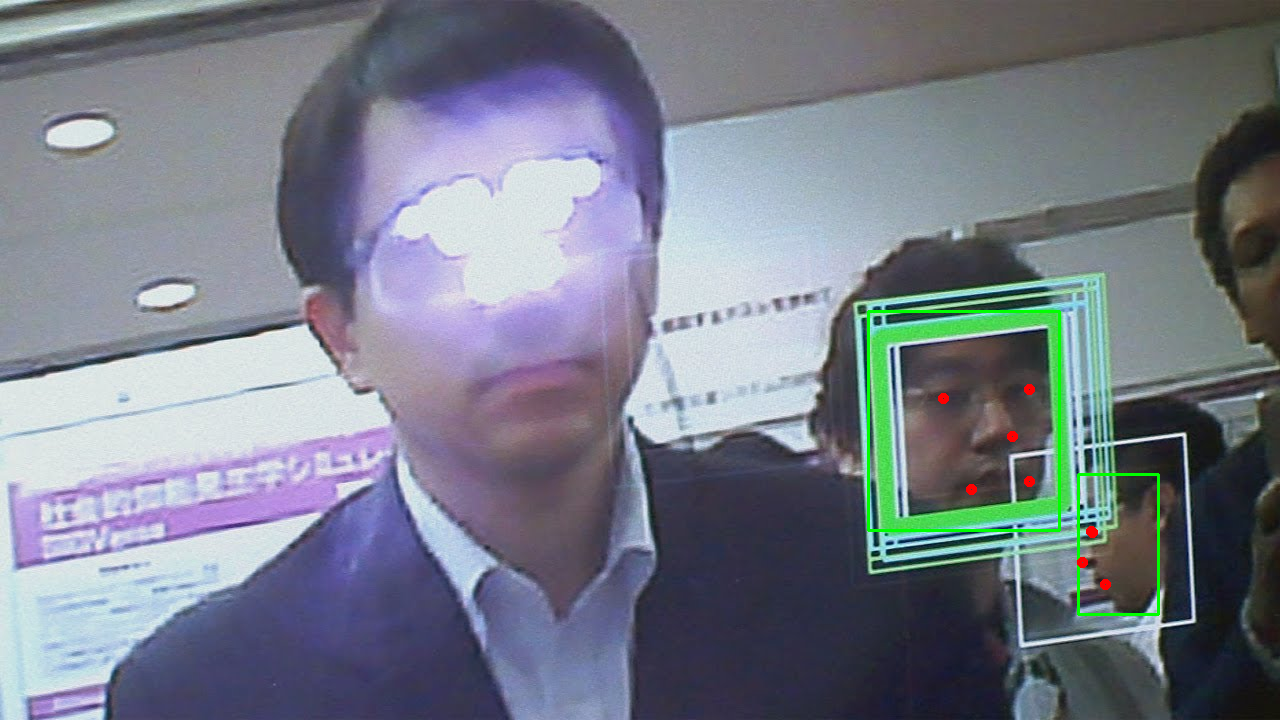

In [67]:
cv2_imshow(img_copy)